In [1]:
from googleapiclient.discovery import build
import seaborn as sns
import pandas as pd

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("API_KEY")



In [4]:
channel_id = 'UCnU7ly6zEcQxUScjhkgFYAQ'

youTube = build('youtube','v3',developerKey=api_key)

In [35]:
#multiple channels ids 
channel_ids = ['UCnU7ly6zEcQxUScjhkgFYAQ', #Thogden
               'UCaTxfj0BzL-MaCy-YUqPRoQ', #THE RACE
               'UCODHrzPMGbNv67e84WDZhQQ', #fern
               'UCrmsp2voP5agAXWHvEPvxsg', #Neeraj Walia
               'UCsObGXVUdSh-bHT7CdVXrrw' #MagicalMessi 
               ]


## Function to get channel statistics

In [36]:
def get_channel_stats(youtube,channel_ids):
    all_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                Subscribers = response['items'][i]['statistics']['subscriberCount'],
                Views = response['items'][i]['statistics']['viewCount'],
                Total_videos = response['items'][i]['statistics']['videoCount'])
        all_data.append(data)

    return all_data



In [37]:
channel_statistics = get_channel_stats(youTube,channel_ids)

In [38]:
channel_statistics

[{'Channel_name': 'THE RACE',
  'Subscribers': '1090000',
  'Views': '524075901',
  'Total_videos': '2404'},
 {'Channel_name': 'Thogden',
  'Subscribers': '1790000',
  'Views': '637442691',
  'Total_videos': '2024'},
 {'Channel_name': 'Neeraj Walia',
  'Subscribers': '353000',
  'Views': '73553552',
  'Total_videos': '1248'},
 {'Channel_name': 'fern',
  'Subscribers': '1290000',
  'Views': '60779870',
  'Total_videos': '34'},
 {'Channel_name': 'MagicalMessi',
  'Subscribers': '1530000',
  'Views': '367673645',
  'Total_videos': '130'}]

In [39]:
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos
0,THE RACE,1090000,524075901,2404
1,Thogden,1790000,637442691,2024
2,Neeraj Walia,353000,73553552,1248
3,fern,1290000,60779870,34
4,MagicalMessi,1530000,367673645,130


In [40]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
dtype: object

In [41]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
dtype: object

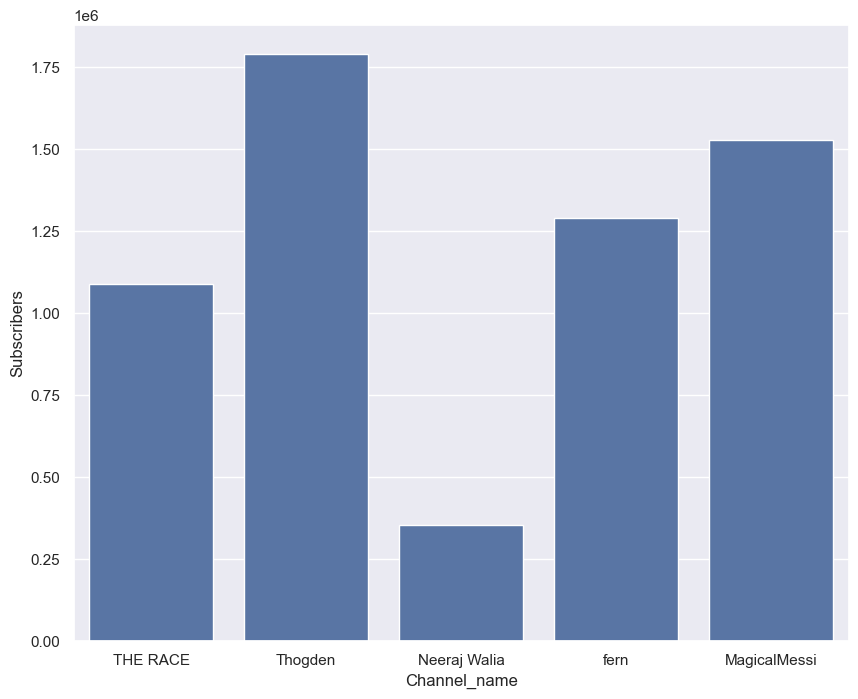

In [43]:
sns.set_theme(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

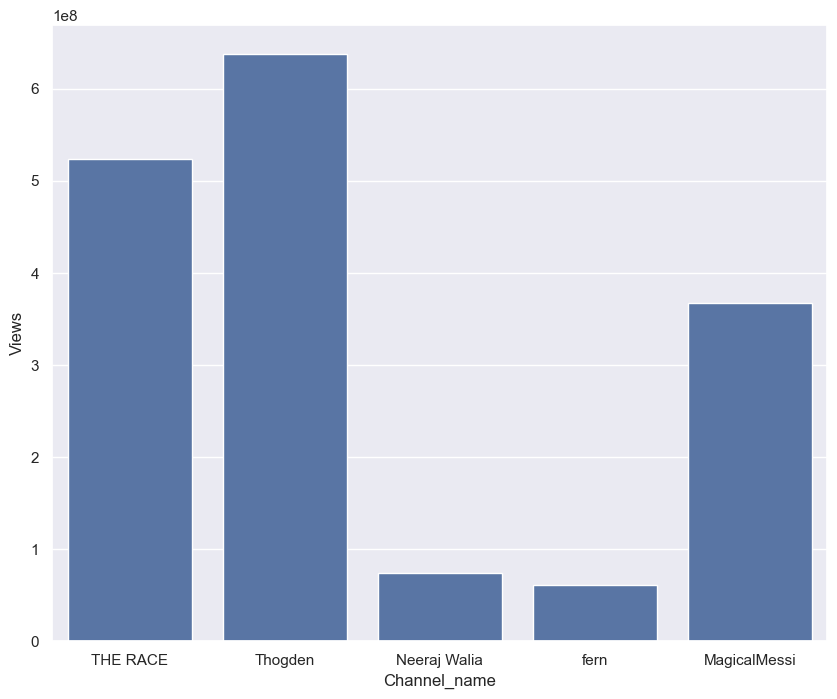

In [44]:
ax = sns.barplot(x='Channel_name',y='Views',data=channel_data)

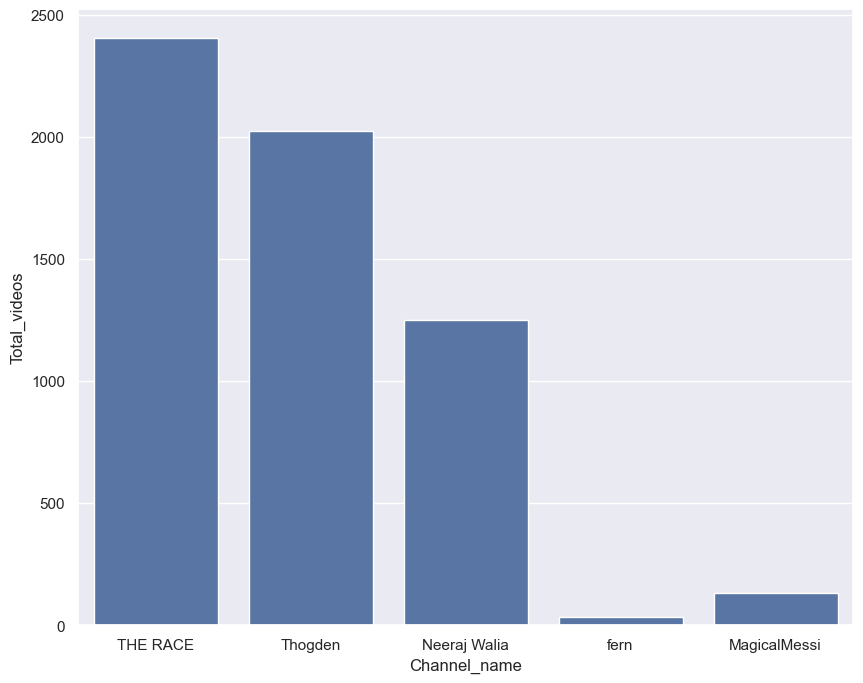

In [47]:
ax = sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)